In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data_folder = "data/synpop_related"
seed_data = pd.read_csv(os.path.join(data_folder, 'pp_sample_ipu.csv'))
seed_data = seed_data.drop(columns=["serialno", "sample_geog"])
seed_data

,age,sex,relationship,persinc,nolicence,anywork
0,50-59,M,Main,$1000-1249 p.w.,Some Licence,Y
1,40-49,F,Spouse,$1-199 p.w.,Some Licence,N
2,10-19,F,Child,Zero Income,No Licence,N
3,0-9,F,Child,Zero Income,No Licence,N
4,50-59,F,Parent,$1-199 p.w.,Some Licence,N
...,...,...,...,...,...,...
75404,60-69,F,Main,$400-599 p.w.,Some Licence,Y
75405,70-79,M,Main,$300-399 p.w.,Some Licence,N
75406,70-79,F,Spouse,$300-399 p.w.,Some Licence,N
75407,70-79,F,Main,$400-599 p.w.,Some Licence,N


In [9]:
test_data = pd.read_csv(os.path.join(data_folder, 'SAA_PP_seed_test.csv'))
test_data

,age,sex,persinc,anywork,nolicence,relationship,zone_id
0,0-9,M,Zero Income,N,No Licence,Child,3029
1,0-9,M,Zero Income,N,No Licence,Child,3029
2,0-9,M,Zero Income,N,No Licence,Child,3029
3,0-9,M,Zero Income,N,No Licence,Child,3029
4,0-9,M,Zero Income,N,No Licence,Child,3029
...,...,...,...,...,...,...,...
6450742,50-59,F,$1250-1499 p.w.,N,Some Licence,Spouse,3980
6450743,40-49,F,$200-299 p.w.,Y,Some Licence,Spouse,3981
6450744,30-39,M,$2000+ p.w.,Y,Some Licence,Main,3987
6450745,50-59,F,$2000+ p.w.,Y,Some Licence,Main,3988


In [12]:
def compare_rela(test_data, seed_data, rela):
    sub_data = test_data[test_data["relationship"] == rela]
    sub_truth = seed_data[seed_data["relationship"] == rela]
    sub_count = sub_data["persinc"].value_counts(normalize=True).sort_index()
    sub_truth_count = sub_truth["persinc"].value_counts(normalize=True).sort_index()
    pd.DataFrame({"SAA": sub_count, "VISTA": sub_truth_count}).plot.bar()

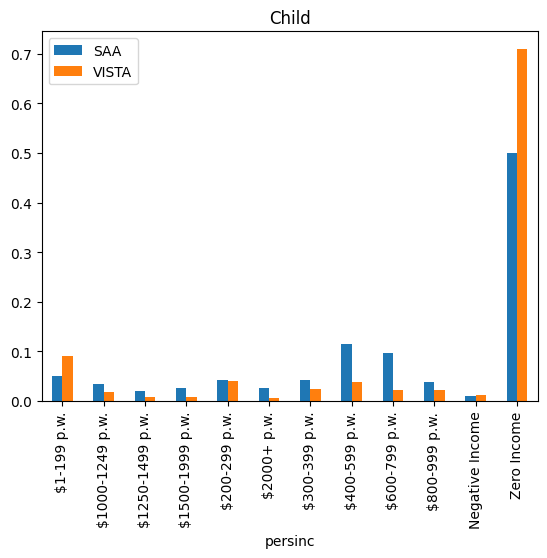

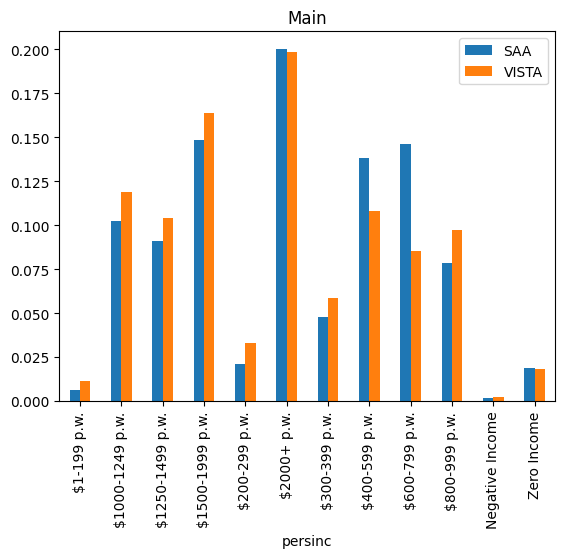

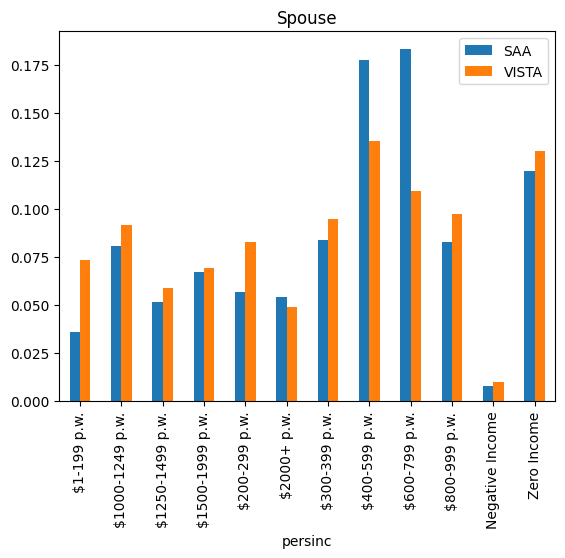

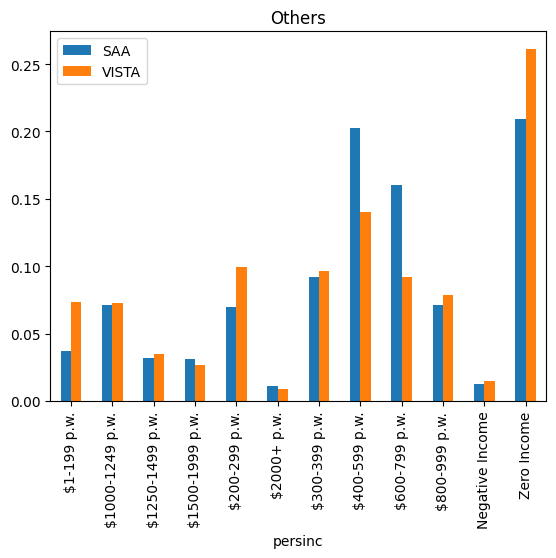

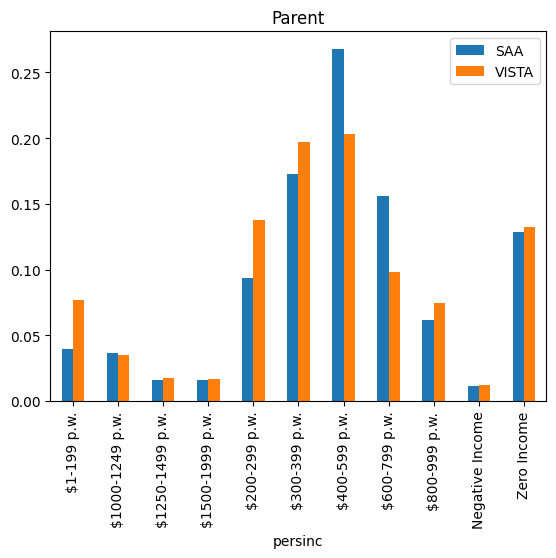

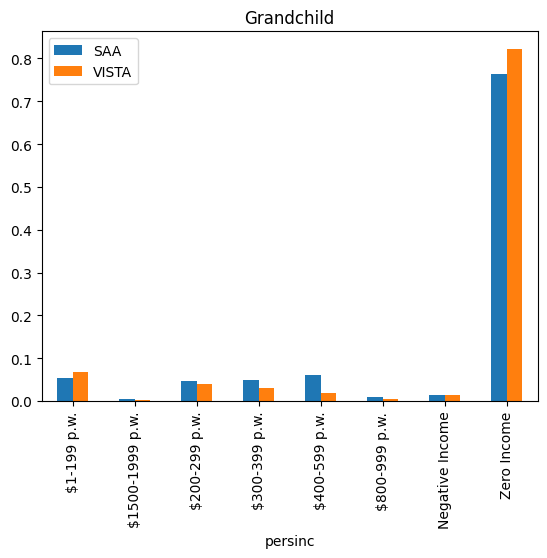

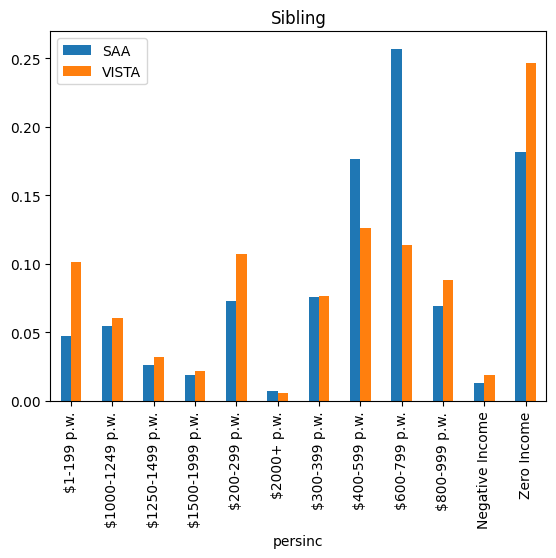

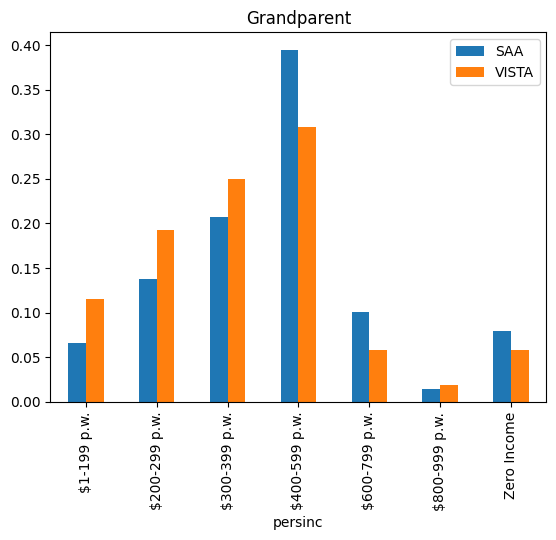

In [13]:
for rela in test_data["relationship"].unique():
    compare_rela(test_data, seed_data, rela)
    plt.title(rela)
    plt.show()